## 정규화, 히트맵, 상관관계 보기!

In [1]:
import pandas as pd


In [2]:
subway=pd.read_csv('../Data/FinalDataset/2022-01-01 ~2022-12_31_dataset.csv')
subway.head()

# subway.columns


,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7,2711,장암,승차,6,7,20,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
1,1,426,2022-01-01,7,2711,장암,하차,2,18,9,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
2,2,969,2022-01-02,7,2711,장암,승차,8,15,21,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
3,3,970,2022-01-02,7,2711,장암,하차,2,9,20,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
4,4,1513,2022-01-03,7,2711,장암,승차,61,273,597,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0


## 히트맵 확인!

In [3]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30678 entries, 0 to 30677
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30678 non-null  int64  
 1   연번          30678 non-null  int64  
 2   수송일자        30678 non-null  object 
 3   호선          30678 non-null  int64  
 4   역사코드        30678 non-null  int64  
 5   역명          30678 non-null  object 
 6   승하차구분       30678 non-null  object 
 7   05          30678 non-null  int64  
 8   06          30678 non-null  int64  
 9   07          30678 non-null  int64  
 10  08          30678 non-null  int64  
 11  09          30678 non-null  int64  
 12  10          30678 non-null  int64  
 13  11          30678 non-null  int64  
 14  12          30678 non-null  int64  
 15  13          30678 non-null  int64  
 16  14          30678 non-null  int64  
 17  15          30678 non-null  int64  
 18  16          30678 non-null  int64  
 19  17          30678 non-nul

In [4]:
# 주중주말 데이터 int로 변경
subway['주중주말'] = subway['주중주말'].map({'DAY': '0', 'SAT': '1'})
subway.주중주말=subway.주중주말.astype(int)
subway.주중주말.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30678 entries, 0 to 30677
Series name: 주중주말
Non-Null Count  Dtype
--------------  -----
30678 non-null  int64
dtypes: int64(1)
memory usage: 239.8 KB


In [5]:
# 데이터프레임의 모든 float 타입 열을 int 타입으로 변환
def convert_float_to_int(df):
    
    float_columns = df.select_dtypes(include=['float64', 'float32']).columns
    df[float_columns] = df[float_columns].astype(int)
    return df

convert_float_to_int(subway)


,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7,2711,장암,승차,6,7,20,...,10,9,9,12,10,9,8,4,6,0
1,1,426,2022-01-01,7,2711,장암,하차,2,18,9,...,10,9,9,12,10,9,8,4,6,0
2,2,969,2022-01-02,7,2711,장암,승차,8,15,21,...,10,9,9,12,10,9,8,4,6,0
3,3,970,2022-01-02,7,2711,장암,하차,2,9,20,...,10,9,9,12,10,9,8,4,6,0
4,4,1513,2022-01-03,7,2711,장암,승차,61,273,597,...,10,9,9,12,10,9,8,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30673,30673,184850,2022-12-05,7,2753,까치울,하차,0,0,0,...,10,10,12,15,16,15,11,11,9,2
30674,30674,189223,2022-12-13,7,2753,까치울,승차,0,0,0,...,10,10,12,15,16,15,11,11,9,2
30675,30675,189224,2022-12-13,7,2753,까치울,하차,0,0,0,...,10,10,12,15,16,15,11,11,9,2
30676,30676,185397,2022-12-06,7,2757,부천시청,승차,0,0,0,...,10,10,11,16,15,16,10,11,10,1


In [6]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [7]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30678 entries, 0 to 30677
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30678 non-null  int64 
 1   연번          30678 non-null  int64 
 2   수송일자        30678 non-null  object
 3   호선          30678 non-null  int64 
 4   역사코드        30678 non-null  int64 
 5   역명          30678 non-null  object
 6   승하차구분       30678 non-null  object
 7   05          30678 non-null  int64 
 8   06          30678 non-null  int64 
 9   07          30678 non-null  int64 
 10  08          30678 non-null  int64 
 11  09          30678 non-null  int64 
 12  10          30678 non-null  int64 
 13  11          30678 non-null  int64 
 14  12          30678 non-null  int64 
 15  13          30678 non-null  int64 
 16  14          30678 non-null  int64 
 17  15          30678 non-null  int64 
 18  16          30678 non-null  int64 
 19  17          30678 non-null  int64 
 20  18    

             요일        년도         월        주차     공휴일여부      주중주말      역사코드  \
요일     1.000000  0.000278  0.012507  0.006586  0.105500  0.405235 -0.000717   
년도     0.000278  1.000000  0.118965 -0.125364  0.149688  0.030235  0.000092   
월      0.012507  0.118965  1.000000  0.966516  0.014413  0.010334  0.001142   
주차     0.006586 -0.125364  0.966516  1.000000 -0.009843 -0.002119  0.001155   
공휴일여부  0.105500  0.149688  0.014413 -0.009843  1.000000  0.060168  0.000291   
주중주말   0.405235  0.030235  0.010334 -0.002119  0.060168  1.000000 -0.000507   
역사코드  -0.000717  0.000092  0.001142  0.001155  0.000291 -0.000507  1.000000   
05     0.082899  0.042998  0.058972  0.052504  0.103767  0.053120  0.134433   
06     0.064602  0.061408  0.060605  0.052911  0.166010  0.088995  0.049502   
07     0.031910  0.058103  0.043627  0.037595  0.170533  0.100749  0.073189   
08     0.029573  0.046557  0.030022  0.025187  0.139173  0.083188  0.140106   
09     0.042566  0.042050  0.043104  0.037627  0.119

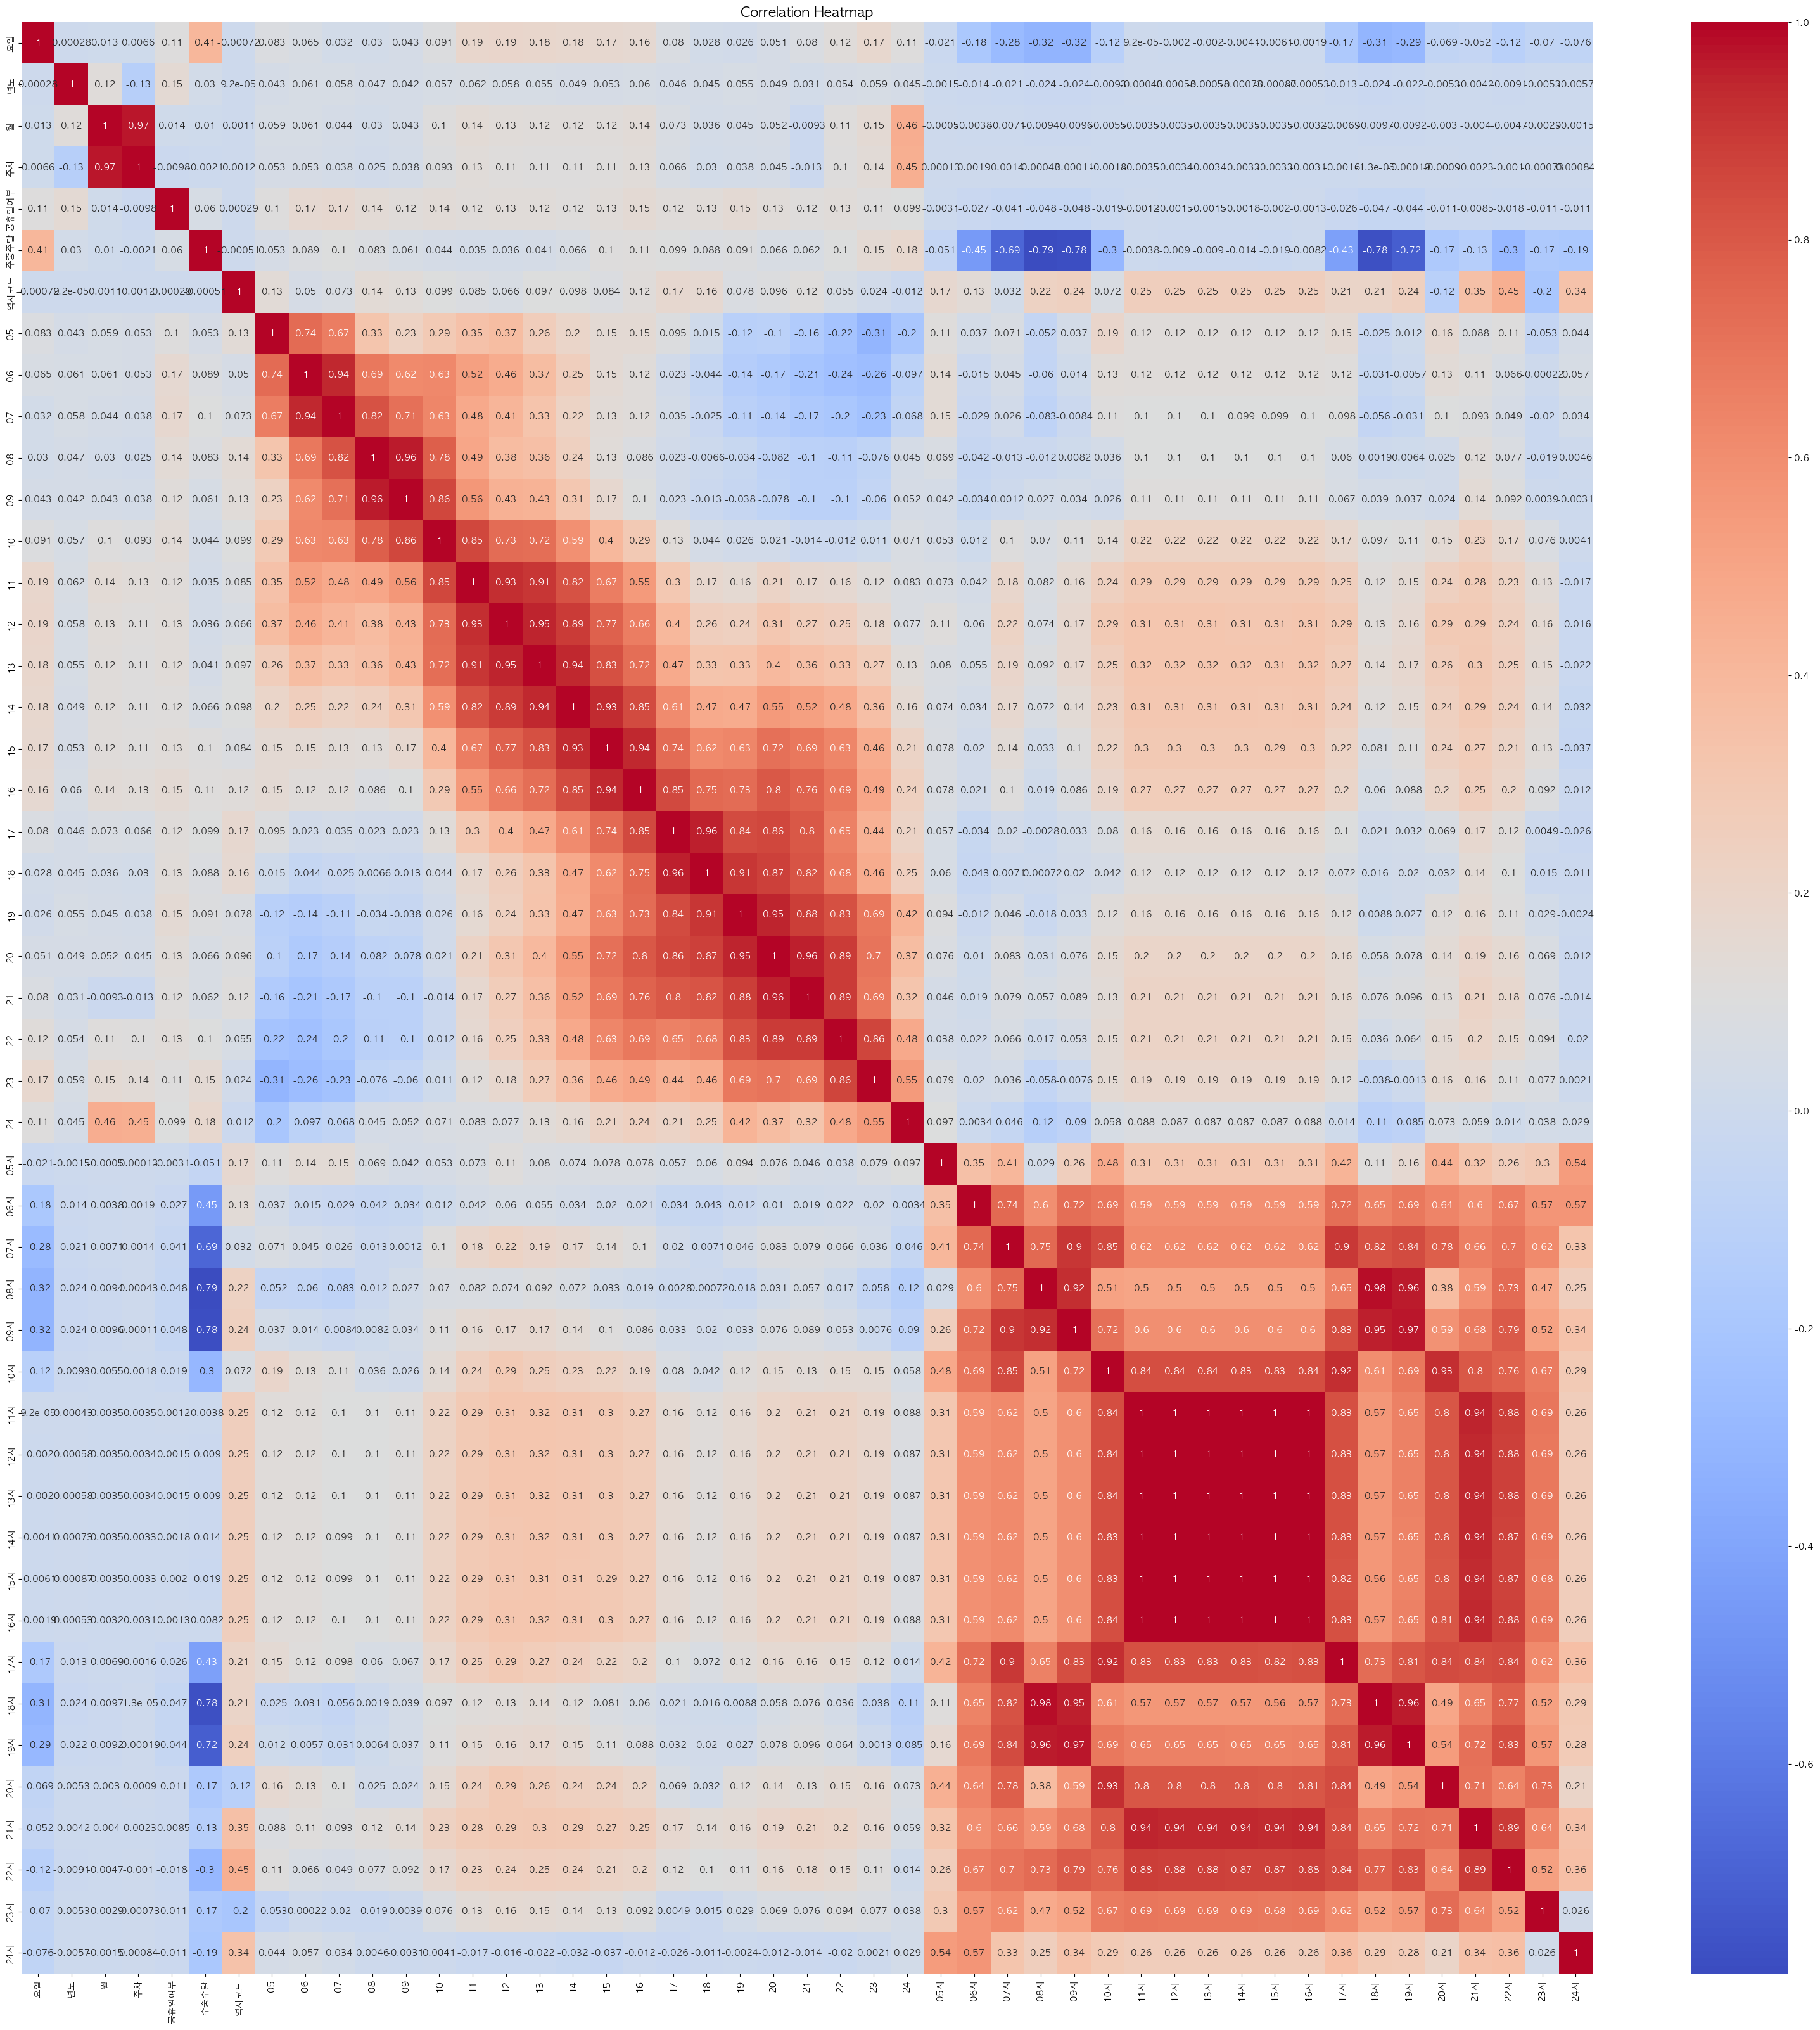

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#int64인 값만 가져와서 column 생성( 너무 ㅁ낳은 데이터가 뽑아져서 컬럼 하나하나 쓰기)
# int_columns = subway.select_dtypes(include=['int64'])
int_columns = subway[['요일', '년도', '월', '주차', '공휴일여부', '주중주말', '역사코드', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']]
# int_columns = subway[['Unnamed: 0', '연번', '호선', '역사코드', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '요일', '년도', '월', '주차', '공휴일여부', '주중주말', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']]

int_columns.head()
# 상관관계 계산
corr = int_columns.corr().T

print(corr)
# 히트맵 그리기
plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# #히트맵
# sns.heatmap(
#     table,
#     annot=True,
#     fmt='d',
#     cmap='RdBu',#YlGnBu
#     linewidths=1.5,
#     cbar=True
# )

# plt.show()

#### 정규화 하기 전 데이터 plot
- 각 column 별로 데이터의 분포를 보자!

In [9]:
subway.columns.unique()

Index(['Unnamed: 0', '연번', '수송일자', '호선', '역사코드', '역명', '승하차구분', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '요일', '년도', '월', '주차', '공휴일여부',
       '주중주말', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시',
       '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시',
       '24시'],
      dtype='object')

In [10]:
subway_in=subway[subway['승하차구분'] == '승차']
subway_out=subway[subway['승하차구분'] == '하차']

subway_out.head()

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시


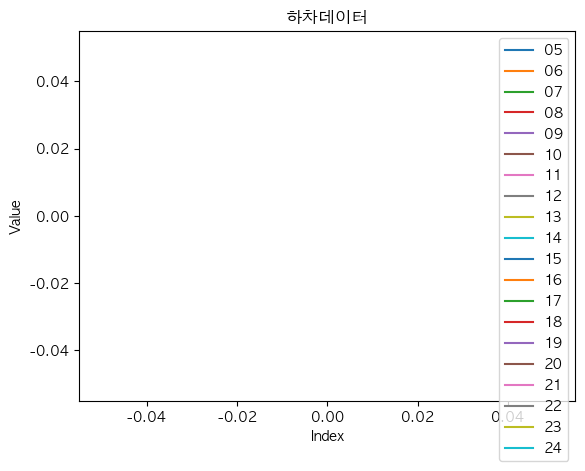

NameError: name 'subway_in' is not defined

In [11]:
import matplotlib.pyplot as plt

# subway_out 데이터 꺾은선 그래프
subway_out.iloc[:, range(7, 27)].plot(kind='line')
plt.title('하차데이터')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# subway_in 데이터 꺾은선 그래프
subway_in.iloc[:, range(7, 27)].plot(kind='line')
plt.title('Subway In Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()


> 모든 시간대를 보니까 너무 어지럽다! 시간별로 확인해보자!

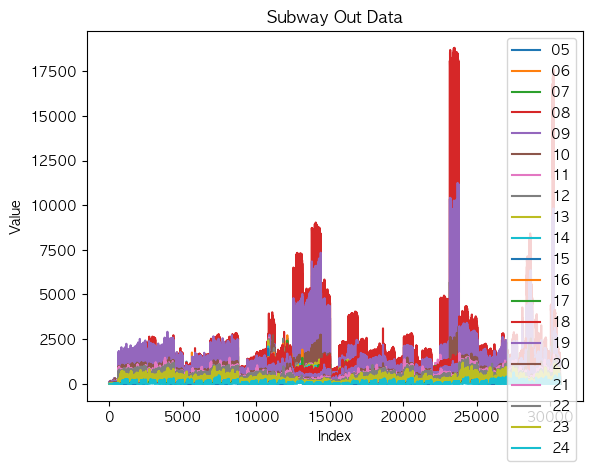

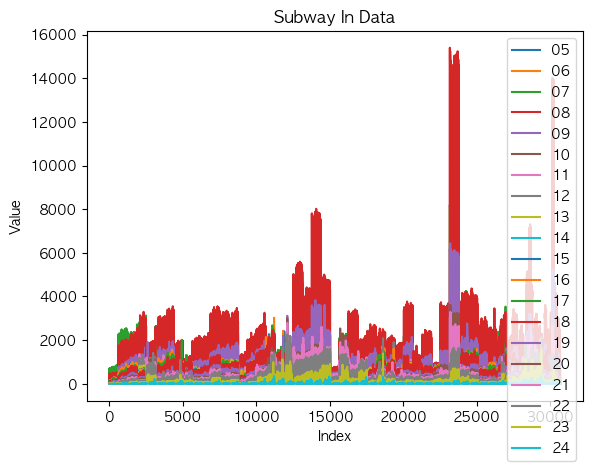

In [ ]:
subway['요일']

0        6
1        6
2        0
3        0
4        1
        ..
30673    1
30674    2
30675    2
30676    2
30677    2
Name: 요일, Length: 30678, dtype: int64

In [ ]:
subway=subway_in

## 히트맵으로 알수 있는점


## 배차시간, 승,하차수 정규화

In [ ]:
subway.columns

Index(['Unnamed: 0', '연번', '수송일자', '호선', '역사코드', '역명', '승하차구분', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '요일', '년도', '월', '주차', '공휴일여부',
       '주중주말', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시',
       '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시',
       '24시'],
      dtype='object')

In [ ]:
# # 승,하차인원 정규화
# from sklearn.preprocessing import MinMaxScaler

# # 정규화할 컬럼 선택 (05 ~ 24)
# cols_to_normalize_1 = ['05', '06','07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19', '20', '21', '22', '23', '24']



# # 정규화할 컬럼 데이터 추출
# data_to_normalize = subway[cols_to_normalize_1]

# # MinMaxScaler 객체 생성
# scaler = MinMaxScaler()

# # 정규화
# data_normalized = scaler.fit_transform(data_to_normalize)

# # 정규화된 데이터를 원본 데이터프레임에 덮어쓰기
# subway[cols_to_normalize_1] = data_normalized

In [ ]:
# # 배차대수 정규화
# from sklearn.preprocessing import MinMaxScaler

# # # 정규화할 컬럼 선택 (05 ~ 24)
# # cols_to_normalize_1 = ['05', '06','07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19', '20', '21', '22', '23', '24']

# # 정규화할 컬럼 선택 (05 ~ 24)
# cols_to_normalize_2 = ['05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']

# # 두 리스트 합치기
# # cols_to_normalize = cols_to_normalize_1 + cols_to_normalize_2

# # 정규화할 컬럼 데이터 추출
# data_to_normalize = subway[cols_to_normalize_2]

# # MinMaxScaler 객체 생성
# scaler = MinMaxScaler()

# # 정규화
# data_normalized = scaler.fit_transform(data_to_normalize)

# # 정규화된 데이터를 원본 데이터프레임에 덮어쓰기
# subway[cols_to_normalize_2] = data_normalized

In [ ]:
subway['21시'].max()

20

In [ ]:
subway['20시'].max()


24

## 배차시간, 승,하차수 표준화

In [ ]:
# 승,하차인원 표준화
from sklearn.preprocessing import StandardScaler

# 표준화할 컬럼 선택 (05 ~ 24)
cols_to_scale = ['05', '06','07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19', '20', '21', '22', '23', '24']

# 표준화할 컬럼 데이터 추출
data_to_scale = subway[cols_to_scale]

# StandardScaler 객체 생성
scaler = StandardScaler()

# 표준화
data_scaled = scaler.fit_transform(data_to_scale)

# 표준화된 데이터를 원본 데이터프레임에 덮어쓰기
subway[cols_to_scale] = data_scaled

In [ ]:
# 승,하차인원 표준화
from sklearn.preprocessing import StandardScaler

# 표준화할 컬럼 선택 (05 ~ 24)
cols_to_scale = ['05', '06','07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18','19', '20', '21', '22', '23', '24','05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']




# 표준화할 컬럼 데이터 추출
data_to_scale = subway[cols_to_scale]

# StandardScaler 객체 생성
scaler = StandardScaler()

# 표준화
data_scaled = scaler.fit_transform(data_to_scale)

# 표준화된 데이터를 원본 데이터프레임에 덮어쓰기
subway[cols_to_scale] = data_scaled

In [ ]:
subway['05'].describe()



count    3.067800e+04
mean    -7.411620e-17
std      1.000016e+00
min     -9.525586e-01
25%     -7.155215e-01
50%     -4.575694e-01
75%      4.975506e-01
max      5.301037e+00
Name: 05, dtype: float64

In [ ]:
subway.head()

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7,2711,장암,승차,-0.910729,-1.172739,-0.900917,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904
1,1,426,2022-01-01,7,2711,장암,하차,-0.938615,-1.134310,-0.913016,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904
2,2,969,2022-01-02,7,2711,장암,승차,-0.896785,-1.144791,-0.899818,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904
3,3,970,2022-01-02,7,2711,장암,하차,-0.938615,-1.165752,-0.900917,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904
4,4,1513,2022-01-03,7,2711,장암,승차,-0.527286,-0.243447,-0.266312,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904


## 정규화,표준화 후 HeatMap

In [ ]:
subway.head()

,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7,2711,장암,승차,-0.910729,-1.172739,-0.900917,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904
1,1,426,2022-01-01,7,2711,장암,하차,-0.938615,-1.134310,-0.913016,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904
2,2,969,2022-01-02,7,2711,장암,승차,-0.896785,-1.144791,-0.899818,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904
3,3,970,2022-01-02,7,2711,장암,하차,-0.938615,-1.165752,-0.900917,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904
4,4,1513,2022-01-03,7,2711,장암,승차,-0.527286,-0.243447,-0.266312,...,-5.931994,-6.166416,-5.2035,-3.506723,-4.037573,-5.029027,-6.008976,-5.858662,-4.558118,-1.718904


             요일        년도         월        주차     공휴일여부      주중주말      역사코드  \
요일     1.000000  0.000278  0.012507  0.006586  0.105500  0.405235 -0.000717   
년도     0.000278  1.000000  0.118965 -0.125364  0.149688  0.030235  0.000092   
월      0.012507  0.118965  1.000000  0.966516  0.014413  0.010334  0.001142   
주차     0.006586 -0.125364  0.966516  1.000000 -0.009843 -0.002119  0.001155   
공휴일여부  0.105500  0.149688  0.014413 -0.009843  1.000000  0.060168  0.000291   
주중주말   0.405235  0.030235  0.010334 -0.002119  0.060168  1.000000 -0.000507   
역사코드  -0.000717  0.000092  0.001142  0.001155  0.000291 -0.000507  1.000000   
05     0.082899  0.042998  0.058972  0.052504  0.103767  0.053120  0.134433   
06     0.064602  0.061408  0.060605  0.052911  0.166010  0.088995  0.049502   
07     0.031910  0.058103  0.043627  0.037595  0.170533  0.100749  0.073189   
08     0.029573  0.046557  0.030022  0.025187  0.139173  0.083188  0.140106   
09     0.042566  0.042050  0.043104  0.037627  0.119

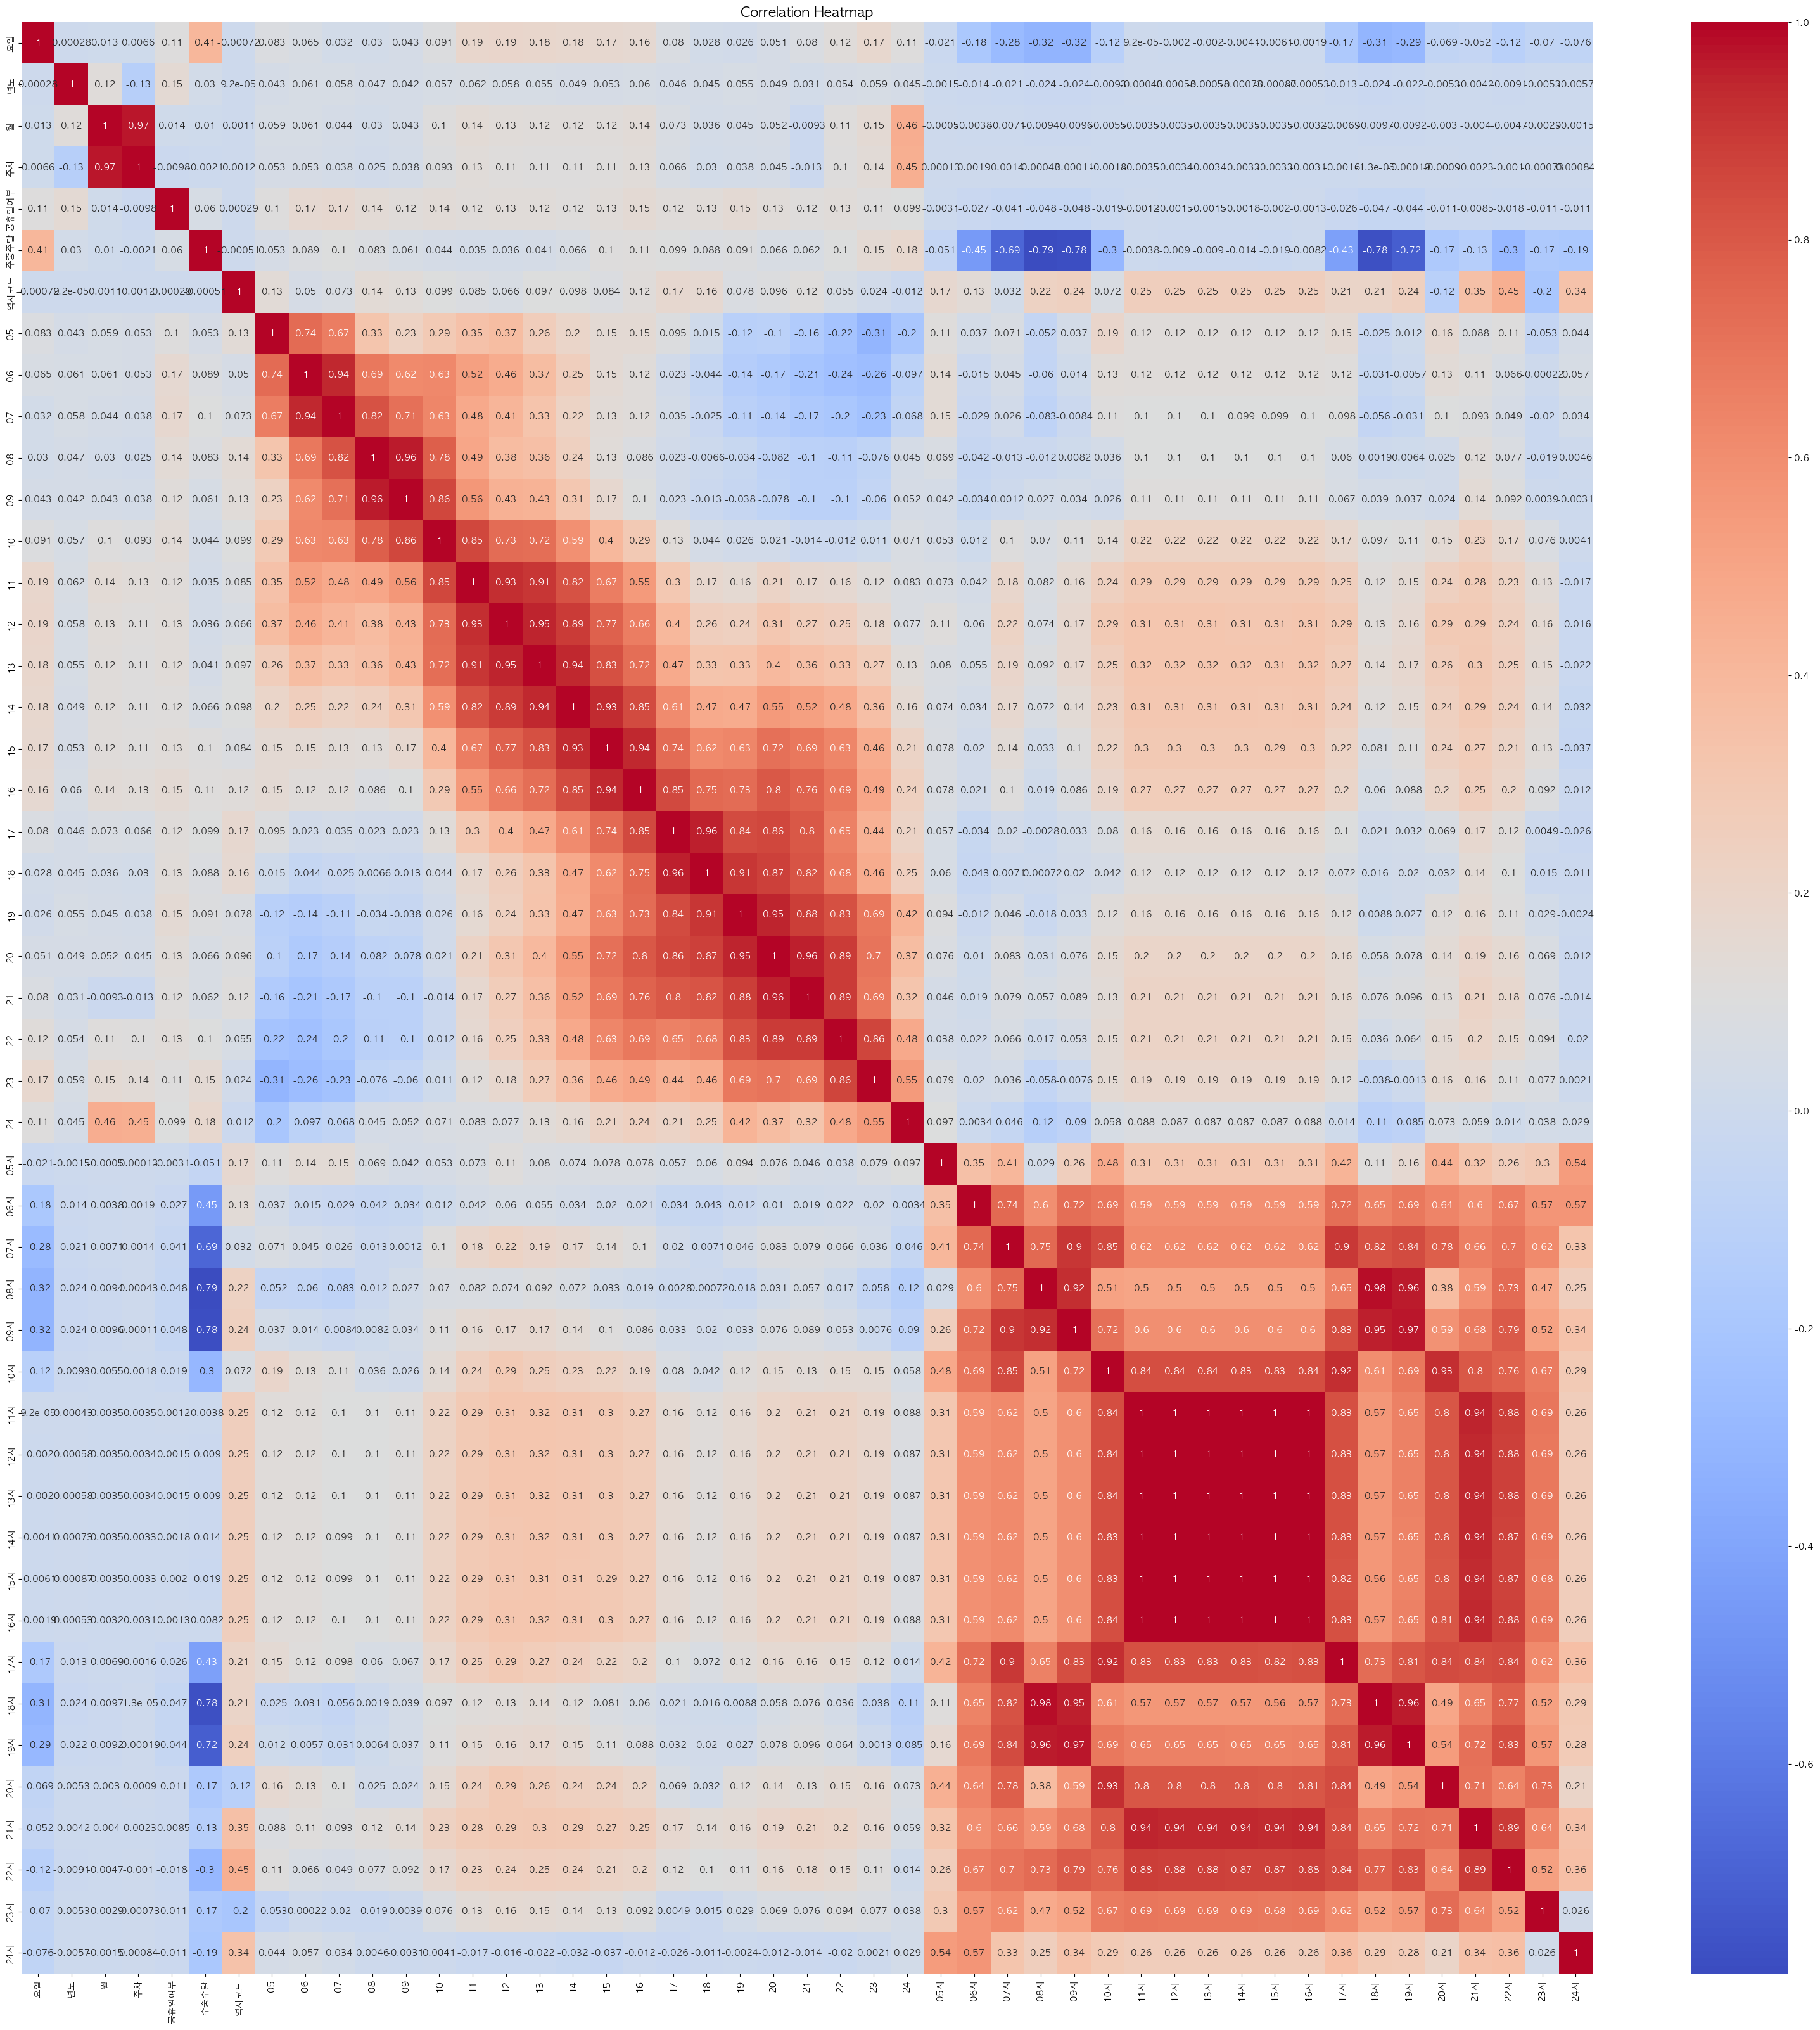

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#int64인 값만 가져와서 column 생성( 너무 ㅁ낳은 데이터가 뽑아져서 컬럼 하나하나 쓰기)
# int_columns = subway.select_dtypes(include=['int64'])
int_columns = subway[['요일', '년도', '월', '주차', '공휴일여부', '주중주말', '역사코드', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']]
# int_columns = subway[['Unnamed: 0', '연번', '호선', '역사코드', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '요일', '년도', '월', '주차', '공휴일여부', '주중주말', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']]

int_columns.head()
# 상관관계 계산
corr = int_columns.corr().T

print(corr)
# 히트맵 그리기
plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# #히트맵
# sns.heatmap(
#     table,
#     annot=True,
#     fmt='d',
#     cmap='RdBu',#YlGnBu
#     linewidths=1.5,
#     cbar=True
# )

# plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#, '수송일자', '역명', '승하차구분''주중주말','공휴일여부',
# 특성 변수(X) 컬럼 선택
features = [ '요일', '년도', '월', '주차', '공휴일여부', '주중주말', '역사코드', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']
X = subway[features]

# 타깃 변수(y) 컬럼 선택
targets = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
y = subway[targets]
#
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature 변경(Train_Test)


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# #, '수송일자', '역명', '승하차구분''주중주말','공휴일여부',
# # 특성 변수(X) 컬럼 선택
# features = [ '요일', '주중주말',  '11시', '12시', '13시', '14시', '15시', '16시']
# X = subway[features]

# # 타깃 변수(y) 컬럼 선택
# targets = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
# y = subway[targets]

# # 학습 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# #, '수송일자', '역명', '승하차구분''주중주말','공휴일여부',
# # 특성 변수(X) 컬럼 선택
# features = [ '요일', '주중주말',  '11시', '12시', '13시', '14시', '15시', '16시']
# X = subway[features]

# # 타깃 변수(y) 컬럼 선택
# targets = ['11', '12', '13', '14', '15', '16']
# y = subway[targets]

# # 학습 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

model = MultiOutputRegressor(Ridge()).fit(X_train, y_train)
# regr.predict(X_test)
y_pred = model.predict(X_test)
# print(y_test.shape)

xx = pd.DataFrame(y_test).iloc[0,:]
yy = pd.DataFrame(y_pred).iloc[0,:]

xx.head()


result = np.column_stack(
    [pd.DataFrame(y_test).iloc[0,:],pd.DataFrame(y_pred).iloc[0,:]]
)
result

# result

# for i, j in zip(y_pred[:,1],y_test[:,1]):
#     print(i,j)
# 각 출력에 대한 R^2 점수 계산
# for i in range(y_test.shape[1]):
#     print(y_test[:, i], y_pred[:, i])
    # score = r2_score(y_test[:, i], y_pred[:, i])
    # print(f"Output {i} R^2 score: {score:.4f}")

array([[ 0.23959845,  0.01350288],
       [-0.10020979, -0.0261005 ],
       [ 0.12303049,  0.00860009],
       [-0.03569356,  0.15740107],
       [-0.1749936 ,  0.13032275],
       [-0.55721617, -0.07774297],
       [-0.64897275, -0.23282907],
       [-0.85381724, -0.21007105],
       [-0.89502249, -0.14655145],
       [-0.71572358, -0.12273089],
       [-0.05271616, -0.11558482],
       [-0.65409063, -0.14463076],
       [-0.40861377,  0.09230751],
       [ 0.02561459,  0.2117187 ],
       [-0.58833235,  0.06206389],
       [-0.693597  ,  0.07225295],
       [-0.76476608,  0.09601383],
       [-0.61101655, -0.19940898],
       [-0.98550994, -0.39126347],
       [-0.59992157, -0.70275015]])

In [ ]:
# 의사결정나무
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 예측값과 실제값 비교
for i, target in enumerate(targets):
    print(f"{target} 컬럼 예측값 vs 실제값:")
    print(f"예측값: {y_pred[:, i][:5]}") # 예측값 중 처음 5개만 출력
    print(f"실제값: {y_test[target].values[:5]}\n") # 실제값 중 처음 5개만 출력
    # # 퍼센트 차이 계산
    mape = mean_absolute_percentage_error(y_test[target], y_pred[:, i])
    print(f"{target} 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: {mape * 100:.2f}%\n")

05 컬럼 예측값 vs 실제값:
예측값: [-0.82009672 -0.56911629 -0.75735162 -0.0392687  -0.04624038]
실제값: [ 0.23959845  0.79733275  1.87794297 -0.75735162 -0.64580475]

05 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 357.43%

06 컬럼 예측값 vs 실제값:
예측값: [-0.55437533 -0.34825405 -0.8548233  -0.56485607 -0.36222837]
실제값: [-0.10020979  1.94353511 -0.01287027 -0.55437533 -0.42161925]

06 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 466.79%

07 컬럼 예측값 vs 실제값:
예측값: [-0.11233456 -0.21901872 -0.68204996 -0.68754914 -0.50717593]
실제값: [ 0.12303049  1.87397047 -0.34769961 -0.70624636 -0.71614489]

07 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 402.82%

08 컬럼 예측값 vs 실제값:
예측값: [ 0.14029258 -0.25606329 -0.37218318 -0.54816931 -0.42946899]
실제값: [-0.03569356  0.58309641 -0.29838254 -0.59461727 -0.52133272]

08 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 587.43%

09 컬럼 예측값 vs 실제값:
예측값: [-0.37172994 -0.19714859 -0.48073251 -0.33450956 -0.35489215]
실제값: [-0.1749936   0.26810628 -0.33007856 -0.38768154 -0.176766  ]

09 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 489.39%

10 컬럼 예측값 vs 실제값:
예측값: [-0.76297891 -0.2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# RandomForest 모델 초기화
model = RandomForestRegressor()

# 모델 훈련
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 예측값과 실제값 비교
for i, target in enumerate(targets):
    print(f"{target} 컬럼 예측값 vs 실제값:")
    print(f"예측값: {y_pred[:, i][:5]}")  # 예측값 중 처음 5개만 출력
    print(f"실제값: {y_test[target].values[:5]}\n")  # 실제값 중 처음 5개만 출력
    # 퍼센트 차이 계산
    mape = mean_absolute_percentage_error(y_test[target], y_pred[:, i])
    print(f"{target} 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: {mape * 100:.2f}%\n")


05 컬럼 예측값 vs 실제값:
예측값: [-0.29424623 -0.36259192 -0.35212395 -0.02170588 -0.14315833]
실제값: [ 0.23959845  0.79733275  1.87794297 -0.75735162 -0.64580475]

05 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 297.17%

06 컬럼 예측값 vs 실제값:
예측값: [-0.35676674 -0.01812228 -0.71018671 -0.50557    -0.41289112]
실제값: [-0.10020979  1.94353511 -0.01287027 -0.55437533 -0.42161925]

06 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 390.79%

07 컬럼 예측값 vs 실제값:
예측값: [-0.03605539  0.08374799 -0.62171145 -0.61092902 -0.54186477]
실제값: [ 0.12303049  1.87397047 -0.34769961 -0.70624636 -0.71614489]

07 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 345.13%

08 컬럼 예측값 vs 실제값:
예측값: [ 0.03832169 -0.11806642 -0.36431137 -0.48920363 -0.44708996]
실제값: [-0.03569356  0.58309641 -0.29838254 -0.59461727 -0.52133272]

08 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 488.08%

09 컬럼 예측값 vs 실제값:
예측값: [-0.30727294 -0.12736923 -0.45077261 -0.30516896 -0.35481387]
실제값: [-0.1749936   0.26810628 -0.33007856 -0.38768154 -0.176766  ]

09 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 408.17%

10 컬럼 예측값 vs 실제값:
예측값: [-0.65912275 -0.1